# Unpolarized radiative cylindrical spacetimes: Trapped surfaces and quasilocal energy by Gonclaves JEKK Metric
##  Geoff Cope
##  Univeristy of Utah
##  December 29, 2021 

Here we work with Metric 1 the JEKK Metric and derive field equations listed as 12-15

https://arxiv.org/abs/gr-qc/0212125

In [109]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [110]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [111]:
t,r,phi,z,dt,dr,dphi,dz = symbols('t r phi z dt dr dphi dz')

In [112]:
psi = Function('psi')(t,r)
psi

In [113]:
omega = Function('omega')(t,r)
omega

In [114]:
gamma = Function('gamma')(t,r)
gamma

In [115]:
variables = Matrix([t,r,phi,z])
variables

⎡t⎤
⎢ ⎥
⎢r⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣z⎦

In [116]:
differentials = Matrix([dt,dr,dphi,dz])
differentials 

⎡ dt ⎤
⎢    ⎥
⎢ dr ⎥
⎢    ⎥
⎢dphi⎥
⎢    ⎥
⎣ dz ⎦

In [117]:
lineElement = expand(exp(2*psi) * (dz + omega * dphi)**2 + r**2 * exp(-2*psi) * dphi**2 + exp(2*(gamma-psi))*(dr**2 - dt**2 ))
lineElement

In [118]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  2⋅γ(t, r)  -2⋅ψ(t, r)                                                                    
⎢-ℯ         ⋅ℯ                      0                              0                        
⎢                                                                                           
⎢                          2⋅γ(t, r)  -2⋅ψ(t, r)                                            
⎢           0             ℯ         ⋅ℯ                             0                        
⎢                                                                                           
⎢                                                  2  -2⋅ψ(t, r)    2        2⋅ψ(t, r)      
⎢           0                       0             r ⋅ℯ           + ω (t, r)⋅ℯ           ω(t,
⎢                                                                                           
⎢                                                                   2⋅ψ(t, r)               
⎣           0                       0                      ω(t, r)⋅ℯ  

In [119]:
import sympy

In [120]:
m = sympy.Array(g)
m

⎡  2⋅γ(t, r)  -2⋅ψ(t, r)                                                                    
⎢-ℯ         ⋅ℯ                      0                              0                        
⎢                                                                                           
⎢                          2⋅γ(t, r)  -2⋅ψ(t, r)                                            
⎢           0             ℯ         ⋅ℯ                             0                        
⎢                                                                                           
⎢                                                  2  -2⋅ψ(t, r)    2        2⋅ψ(t, r)      
⎢           0                       0             r ⋅ℯ           + ω (t, r)⋅ℯ           ω(t,
⎢                                                                                           
⎢                                                                   2⋅ψ(t, r)               
⎣           0                       0                      ω(t, r)⋅ℯ  

In [121]:
from einsteinpy.symbolic import *

In [122]:
syms = sympy.symbols("t r phi z")
t,r,phi,z = syms

In [123]:
metric = MetricTensor(m,syms)

In [124]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢⎡∂             ∂            ∂             ∂                                                
⎢⎢──(γ(t, r)) - ──(ψ(t, r))  ──(γ(t, r)) - ──(ψ(t, r))                                      
⎢⎢∂t            ∂t           ∂r            ∂r                                               
⎢⎢                                                                                          
⎢⎢∂             ∂            ∂             ∂                                                
⎢⎢──(γ(t, r)) - ──(ψ(t, r))  ──(γ(t, r)) - ──(ψ(t, r))                                      
⎢⎢∂r            ∂r           ∂t            ∂t                         

In [125]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                                                                           
⎢                                                                               ∂           
⎢  2              2              2                           2     2            ──(γ(t, r)) 
⎢ ∂              ∂              ∂               ⎛∂          ⎞     ∂             ∂r          
⎢───(γ(t, r)) - ───(γ(t, r)) - ───(ψ(t, r)) - 2⋅⎜──(ψ(t, r))⎟  + ───(ψ(t, r)) + ─────────── 
⎢  2              2              2              ⎝∂t         ⎠      2                 r      
⎢∂r             ∂t             ∂r                                ∂t                         
⎢                                                                                           
⎢                                                                                           
⎢                                                         ∂              4⋅ψ(t, r) ∂        
⎢                                                         ──(γ(t, r)) 

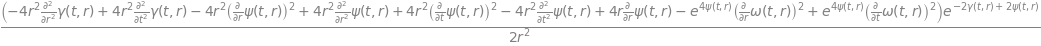

In [126]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [127]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

KeyboardInterrupt: 

In [ ]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [ ]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [ ]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

In [ ]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

In [139]:
equation12 =Eq( diff(gamma,r), expand(solve( simplify( Ric.tensor()[0,0] + Ric.tensor()[1,1] ) , diff(gamma,r) )[0]) ) 
equation12

In [132]:
equation13 = Eq(diff(gamma,t),solve( Ric.tensor()[0,1] , diff(gamma,t) )[0])
equation13

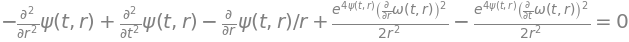

In [147]:
equation14 = Eq(expand((1/r**2)*Ric.tensor()[3,3].args[1]),0)
equation14

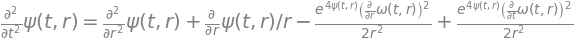

In [155]:
d2psidt2 = Eq( diff(psi,t,t), expand(solve( equation14 , diff(psi,t,t) )[0]))
d2psidt2

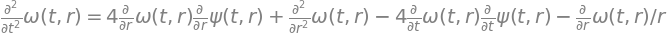

In [159]:
equation15 = Eq(diff(omega,t,t),solve( Ric.tensor()[2,3].args[2].subs(d2psidt2.args[0],d2psidt2.args[1]) , diff(omega,t,t))[0])
equation15

In [161]:
vacuumFieldEquations = Matrix([equation12,equation13,equation14,equation15])
vacuumFieldEquations

⎡                                                                            2              
⎢                                                     4⋅ψ(t, r) ⎛∂          ⎞     4⋅ψ(t, r) 
⎢                             2                  2   ℯ         ⋅⎜──(ω(t, r))⎟    ℯ         ⋅
⎢∂               ⎛∂          ⎞      ⎛∂          ⎞               ⎝∂r         ⎠               
⎢──(γ(t, r)) = r⋅⎜──(ψ(t, r))⎟  + r⋅⎜──(ψ(t, r))⎟  + ───────────────────────── + ───────────
⎢∂r              ⎝∂r         ⎠      ⎝∂t         ⎠               4⋅r                         
⎢                                                                                           
⎢                                                          4⋅ψ(t, r) ∂           ∂          
⎢                                                         ℯ         ⋅──(ω(t, r))⋅──(ω(t, r))
⎢             ∂                 ∂           ∂                        ∂r          ∂t         
⎢             ──(γ(t, r)) = 2⋅r⋅──(ψ(t, r))⋅──(ψ(t, r)) + ────────────